<a href="https://colab.research.google.com/github/VikasRavidas/Chat-app/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [14]:
##The man, wolf, goat and cabbage problem

In [21]:
from collections import deque

def is_valid(state):
    M, W, G, C = state
    # Wolf eats goat
    if W == G and M != W:
        return False
    # Goat eats cabbage
    if G == C and M != G:
        return False
    return True

def get_neighbors(state):
    M, W, G, C = state
    neighbors = []
    for move in range(4):  # 0=M,1=W,2=G,3=C
        new = list(state)
        if move == 0:
            new[0] = 1 - M
        else:
            if state[move] == M:
                new[move] = 1 - state[move]
                new[0] = 1 - M
        new = tuple(new)
        if is_valid(new):
            neighbors.append(new)
    return neighbors

def bfs_mwgc():
    start = (0,0,0,0)
    goal = (1,1,1,1)

    q = deque([(start, [])])
    visited = set([start])

    while q:
        state, path = q.popleft()
        if state == goal:
            return path + [state]

        for n in get_neighbors(state):
            if n not in visited:
                visited.add(n)
                q.append((n, path + [state]))

solution = bfs_mwgc()
for s in solution:
    print(s)


(0, 0, 0, 0)
(1, 0, 1, 0)
(0, 0, 1, 0)
(1, 1, 1, 0)
(0, 1, 0, 0)
(1, 1, 0, 1)
(0, 1, 0, 1)
(1, 1, 1, 1)


In [19]:
## 2. The 9 puzzle and the 15 puzzle

In [28]:
def solve_8_puzzle():
    print("--- Solving Problem B: The 8-Puzzle (IDDFS) ---")

    # 0 represents the empty tile
    start_board = ((1, 2, 3), (4, 5, 0), (7, 8, 6)) # Easy configuration
    goal_board = ((1, 2, 3), (4, 5, 6), (7, 8, 0))

    def get_blank(board):
        for r in range(3):
            for c in range(3):
                if board[r][c] == 0: return r, c

    def get_neighbors(board):
        neighbors = []
        r, c = get_blank(board)
        # Up, Down, Left, Right moves
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        board_list = [list(row) for row in board]
        for dr, dc in moves:
            nr, nc = r + dr, c + dc
            if 0 <= nr < 3 and 0 <= nc < 3:
                # Swap
                board_list[r][c], board_list[nr][nc] = board_list[nr][nc], board_list[r][c]
                neighbors.append(tuple(tuple(row) for row in board_list))
                # Swap back
                board_list[r][c], board_list[nr][nc] = board_list[nr][nc], board_list[r][c]
        return neighbors

    # Depth Limited Search
    def dls(path, depth):
        current = path[-1]
        if current == goal_board:
            return path
        if depth <= 0:
            return None

        for neighbor in get_neighbors(current):
            if neighbor not in path: # Avoid cycles in current path
                res = dls(path + [neighbor], depth - 1)
                if res: return res
        return None

    # Iterative Deepening
    for limit in range(20): # Try depths 0 to 19
        print(f"  Searching at depth limit: {limit}...")
        solution = dls([start_board], limit)
        if solution:
            print(f"Solved in {len(solution)-1} moves!")
            for step in solution:
                for row in step: print(row)
                print("  ⬇️")
            print("  Goal Reached.")
            return

solve_8_puzzle()
print("\n" + "="*40 + "\n")

--- Solving Problem B: The 8-Puzzle (IDDFS) ---
  Searching at depth limit: 0...
  Searching at depth limit: 1...
Solved in 1 moves!
(1, 2, 3)
(4, 5, 0)
(7, 8, 6)
  ⬇️
(1, 2, 3)
(4, 5, 6)
(7, 8, 0)
  ⬇️
  Goal Reached.




In [ ]:
##3. The 8 queens problem

In [36]:
def solve_8_queens():
    print("--- Solving Problem C: 8 Queens (DFS Backtracking) ---")
    n = 8
    board = [-1] * n # board[row] = col_index

    def is_safe(row, col):
        for r in range(row):
            c = board[r]
            if c == col or abs(c - col) == abs(r - row):
                return False
        return True

    def dfs(row):
        if row == n:
            return True # All placed

        for col in range(n):
            if is_safe(row, col):
                board[row] = col
                if dfs(row + 1): return True
                board[row] = -1 # Backtrack
        return False

    if dfs(0):
        print(" Solution Found:")
        print(f"Vector format: {board} (index=row, value=col)")
        for r in range(n):
            line = [". "] * n
            line[board[r]] = "Q "
            print("".join(line))
    else:
        print("No solution.")

solve_8_queens()
print("\n" + "="*40 + "\n")

--- Solving Problem C: 8 Queens (DFS Backtracking) ---
 Solution Found:
Vector format: [0, 4, 7, 5, 2, 6, 1, 3] (index=row, value=col)
Q . . . . . . . 
. . . . Q . . . 
. . . . . . . Q 
. . . . . Q . . 
. . Q . . . . . 
. . . . . . Q . 
. Q . . . . . . 
. . . Q . . . . 




In [ ]:
#4. Obtaining 5 from 4 using only factorial, square root, and floor functions

In [40]:
import math
from collections import deque

def solve_simple():
    # Start with 4
    # Queue stores tuples: (current_value, path_string)
    queue = deque([ (4, "4") ])

    # Keep track of numbers we've seen to avoid loops
    visited = {4}

    print("Searching...")

    while queue:
        val, path = queue.popleft()

        # Check if we reached 5
        if val == 5:
            print("\nFOUND IT!")
            print(f"Path: {path} = 5")
            return

        # Try all 3 allowed operations

        # 1. FLOOR
        res_floor = math.floor(val)
        if res_floor not in visited:
            visited.add(res_floor)
            queue.append((res_floor, f"floor({path})"))

        # 2. SQUARE ROOT (only if positive)
        if val > 0:
            res_sqrt = math.sqrt(val)
            # Use limited precision to avoid infinite decimal loops
            if round(res_sqrt, 5) not in visited:
                visited.add(round(res_sqrt, 5))
                queue.append((res_sqrt, f"sqrt({path})"))

        # 3. FACTORIAL (only if integer and safe size)
        # We limit input to 25 to prevent crashing the computer with huge numbers
        if val > 0 and val < 25 and float(val).is_integer():
            res_fact = math.factorial(int(val))
            if res_fact not in visited:
                visited.add(res_fact)
                queue.append((res_fact, f"({path})!"))

solve_simple()

Searching...

FOUND IT!
Path: floor(sqrt(sqrt(sqrt(sqrt(sqrt(((4)!)!)))))) = 5


Generating 100 points...
Building edges (this may take a moment to check intersections)...
  Added 50 edges...
  Added 100 edges...
  Added 150 edges...
  Added 200 edges...
Final Graph: 100 vertices, 200 edges.
Running UCS from Node 0 to 99...
Path found: [0, 38, 76, 99]


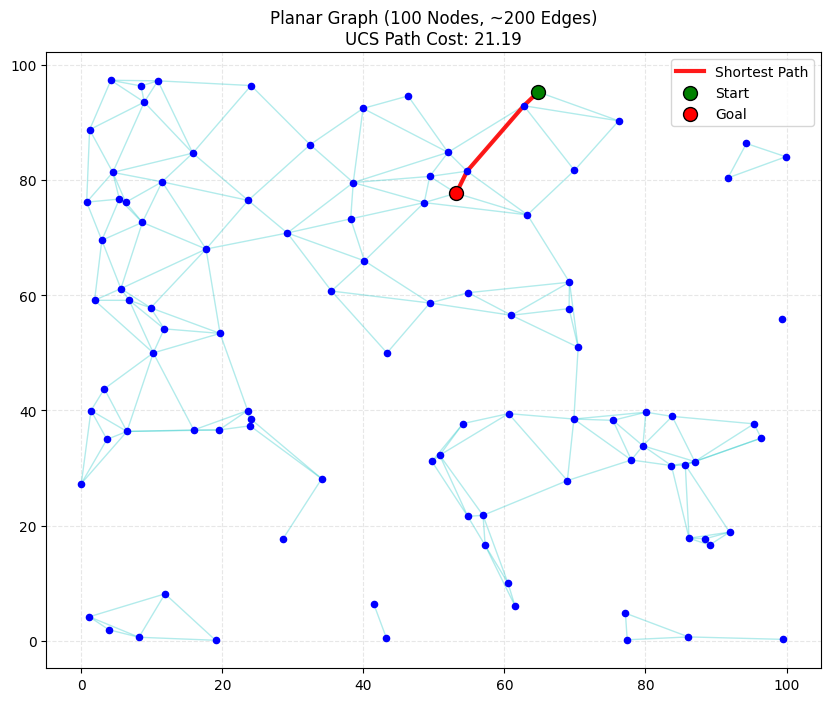

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
import heapq
import random


def dist(p1, p2):
    """Euclidean distance between two points."""
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def ccw(A, B, C):
    """
    Check if three points A, B, C are listed in counter-clockwise order.
    Returns True/False.
    """
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

def intersect(A, B, C, D):
    """
    Return True if line segments AB and CD intersect.
    We exclude the case where they share an endpoint (graph adjacency).
    """

    if np.array_equal(A, C) or np.array_equal(A, D) or \
       np.array_equal(B, C) or np.array_equal(B, D):
        return False


    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)


def generate_planar_graph(num_points=100, target_edges=200):
    print(f"Generating {num_points} points...")

    points = np.random.rand(num_points, 2) * 100

    adj = {i: [] for i in range(num_points)}
    edges = [] # Store pairs (i, j)


    possible_edges = []
    for i in range(num_points):
        for j in range(i + 1, num_points):
            d = dist(points[i], points[j])
            possible_edges.append((d, i, j))


    possible_edges.sort(key=lambda x: x[0])

    print("Building edges (this may take a moment to check intersections)...")
    count = 0

    # Try to add edges
    for d, u, v in possible_edges:
        if count >= target_edges:
            break

        # Check intersection with ALL currently existing edges
        is_crossing = False
        p1, p2 = points[u], points[v]

        for (existing_u, existing_v) in edges:
            p3, p4 = points[existing_u], points[existing_v]
            if intersect(p1, p2, p3, p4):
                is_crossing = True
                break

        if not is_crossing:
            # Add edge
            adj[u].append((v, d))
            adj[v].append((u, d))
            edges.append((u, v))
            count += 1
            if count % 50 == 0:
                print(f"  Added {count} edges...")

    print(f"Final Graph: {num_points} vertices, {len(edges)} edges.")
    return points, adj, edges

# ==========================================
# 3. UNIFORM COST SEARCH
# ==========================================

def uniform_cost_search(adj, start_node, goal_node):
    print(f"Running UCS from Node {start_node} to {goal_node}...")

    # Priority Queue: stores (cost, current_node, path_list)
    pq = [(0, start_node, [start_node])]
    visited = set()

    while pq:
        # Pop element with lowest cost
        cost, u, path = heapq.heappop(pq)

        if u in visited:
            continue
        visited.add(u)

        # Goal check
        if u == goal_node:
            return path, cost

        # Expand neighbors
        for v, weight in adj[u]:
            if v not in visited:
                heapq.heappush(pq, (cost + weight, v, path + [v]))

    return None, float('inf')

# ==========================================
# 4. MAIN EXECUTION & PLOTTING
# ==========================================

# A. Generate Data
points, adj_list, edge_list = generate_planar_graph(100, 200)

# B. Pick Start and End
# We pick index 0 and index 99 (or max distance pair to make it interesting)
start = 0
goal = 99

# Ensure graph component connectivity (simple check)
# If 0 cannot reach 99, we pick random nodes until a path exists
path, cost = uniform_cost_search(adj_list, start, goal)
attempts = 0
while path is None and attempts < 100:
    start = random.randint(0, 99)
    goal = random.randint(0, 99)
    if start != goal:
        path, cost = uniform_cost_search(adj_list, start, goal)
    attempts += 1

# C. Plotting
plt.figure(figsize=(10, 8))
plt.title(f"Planar Graph (100 Nodes, ~200 Edges)\nUCS Path Cost: {cost:.2f}")

# 1. Draw all edges
for u, v in edge_list:
    p1 = points[u]
    p2 = points[v]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'c-', alpha=0.3, linewidth=1)

# 2. Draw Nodes
plt.scatter(points[:, 0], points[:, 1], c='blue', s=20, zorder=5)

# 3. Draw Path (if found)
if path:
    print(f"Path found: {path}")
    path_x = [points[u][0] for u in path]
    path_y = [points[u][1] for u in path]
    plt.plot(path_x, path_y, 'r-', linewidth=3, alpha=0.9, label='Shortest Path')

    # Highlight Start/End
    plt.scatter(points[start][0], points[start][1], c='green', s=100, edgecolors='black', label='Start', zorder=10)
    plt.scatter(points[goal][0], points[goal][1], c='red', s=100, edgecolors='black', label='Goal', zorder=10)
    plt.legend()
else:
    print("No path found (nodes might be in disconnected components).")

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()